there are several manners in which we can reduce overfitting in deep learning models. the best option is to **get more training data**. or **lower the capacity of the model to memorize the training data**. 

https://towardsdatascience.com/handling-overfitting-in-deep-learning-models-c760ee047c6e

In [ ]:
pip install keras

In [ ]:
import pandas as pd
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
!pip install nlp-id

In [ ]:
from sklearn.model_selection import train_test_split
import nltk
from nlp_id.stopword import StopWord
from nlp_id.tokenizer import PhraseTokenizer #untuk tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

In [ ]:
NB_WORDS = 30000
NB_START_EPOCHS = 20
BATCH_SIZE = 512
MAX_LEN = 20

In [ ]:
root = Path('../')
input_path = root / 'input/' 
ouput_path = root / 'output/'
source_path = root / 'source/'

In [ ]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
from nlp_id.lemmatizer import Lemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
import re
from sklearn import metrics

In [ ]:
data = pd.read_csv('news.csv')
data_clean = data.copy()
data_clean['artikel'] = data_clean['artikel'].apply(lambda x: BeautifulSoup(x, 'lxml').text)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
link_berita2 = ['https://www.portonews.com/2021/laporan-utama/pttep-salurkan-bantuan-korban-banjir-dan-longsor-ntt/',
'https://investor.id/business/pttep-bantu-korban-banjir-dan-longsor-ntt',
'https://www.wartaekonomi.co.id/read335793/target-500000-pasien-gerai-sehat-rorotan-kukuhkan-khidmat-untuk-masyarakat',
'https://tobakab.go.id/area-pengolahan-sampah-kawasan-terpadu-di-kabupaten-toba-resmi-beroperasi/',
'https://www.republika.co.id/berita/qr8fsl423/gerai-sehat-rorotan-mengukuhkan-khidmat-untuk-masyarakat',
'https://www.beritasatu.com/photo/54653/bantuan-untuk-korban-banjir-dan-longsor-di-ntt',
'https://www.neraca.co.id/article/144482/dukung-target-pengurangan-sampah-hingga-30-pada-2025-lentera-anak-dorong-sekolah-jadi-agent-of-change-penanganan-sampah',
'https://www.lenteraanak.org/content/berita_terkini/dukung_pencapaian_target_pengurangan_sampah_pada_2025_lentera_anak_dukung_sekolah_jadi_agent_of_change_penanganan_sampah',
'https://www.lintasntt.com/petani-dari-rote-menang-gugatan-lawan-pptep-di-pengadilan-australia/',
'https://money.kompas.com/read/2021/03/22/103100626/kalah-dari-petani-rumput-laut-ntt-dalam-kasus-tumpahan-minyak-montara-pttep',
'https://regional.kompas.com/read/2021/03/22/102950578/petani-rumput-laut-ntt-menangi-gugatan-tumpahan-minyak-australia-setelah-12',
'https://regional.kompas.com/read/2021/03/21/110100478/ribuan-petani-rumput-laut-ntt-menang-ganti-rugi-tumpahan-minyak-australia',
'https://money.kompas.com/read/2021/03/19/203303926/luhut-senang-perusahaan-thailand-yang-tumpahkan-minyak-di-laut-ri-diganjar-rp',
'https://www.beritasatu.com/photo/53445/gerai-sehat-rorotan-kukuhkan-khidmat-untuk-masyarakat',
'https://neracabisnis.com/pttep-bantu-korban-banjir-dan-longsor-ntt/',
'https://limbahnews.com/menang-di-australia-gugatan-petani-rumput-laut-ntt-soal-pencemaran/',
'https://theconversation.com/narasi-yang-hilang-dari-liputan-media-tentang-tumpahan-minyak-montara-102253'
]

In [ ]:
beritadua = set(link_berita2)
link_beritadua = list(beritadua)

In [ ]:
def get_news(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    news = soup.find_all('p')
    list_news = []
    for new in news:
        text = new.get_text()
        list_news.append(text)
        berita = ' '.join(list_news)
    return berita

In [ ]:
beritas = []
for link in link_berita2:
  try:
    berita = get_news(link)
    beritas.append(berita)
    print('sukses')
    print(link)
  except:
    print('fail '+ link)
    #pass

sukses
https://www.portonews.com/2021/laporan-utama/pttep-salurkan-bantuan-korban-banjir-dan-longsor-ntt/
sukses
https://investor.id/business/pttep-bantu-korban-banjir-dan-longsor-ntt
sukses
https://www.wartaekonomi.co.id/read335793/target-500000-pasien-gerai-sehat-rorotan-kukuhkan-khidmat-untuk-masyarakat
sukses
https://tobakab.go.id/area-pengolahan-sampah-kawasan-terpadu-di-kabupaten-toba-resmi-beroperasi/
sukses
https://www.republika.co.id/berita/qr8fsl423/gerai-sehat-rorotan-mengukuhkan-khidmat-untuk-masyarakat
sukses
https://www.beritasatu.com/photo/54653/bantuan-untuk-korban-banjir-dan-longsor-di-ntt
sukses
https://www.neraca.co.id/article/144482/dukung-target-pengurangan-sampah-hingga-30-pada-2025-lentera-anak-dorong-sekolah-jadi-agent-of-change-penanganan-sampah
sukses
https://www.lenteraanak.org/content/berita_terkini/dukung_pencapaian_target_pengurangan_sampah_pada_2025_lentera_anak_dukung_sekolah_jadi_agent_of_change_penanganan_sampah
sukses
https://www.lintasntt.com/petani-

In [ ]:
print(len(beritas))
news2 = pd.DataFrame(beritas, columns=['artikel'])
sentimens = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,0, 1, 1, 0, 0]
print(len(sentimens))

17
17


In [ ]:
news2['sentimen'] = sentimens

In [ ]:
news2.tail()

artikel  sentimen
12  Luhut Senang Perusahaan Thailand yang Tumpahka...         0
13  AGRI  1577 (0)   |   BASIC-IND  938 (0)   |   ...         1
14   Neracabisnis.com, Jakarta, 20 April 2021 – PT...         1
15  Informasi Limbah,  Solusi, dan Ekonomi Sirkula...         0
16  \n      Lecturer in the School of Media, Cultu...         0

In [ ]:
beritas[0]

'Jakarta, Portonews.com – Intensitas hujan tinggi pada dini hari, Minggu (4/4/2021), pukul 01.00 hingga 10.00 WITA mengakibatkan terjadinya banjir besar di beberapa titik wilayah Nusa Tenggara Timur. Badan Daerah Penanggulangan Bencana (BDPD), Provinsi NTT, pada 12 April 2021 merilis laporan terkini kondisi pasca bencana. Dalam laporannya BDPB melaporkan 179 orang meninggal dunia, 45 orang hilang, 271 orang luka-luka, 11.406 orang mengungsi, dan 461.359 orang terdampak banjir. Sementara itu, 14.779 bangunan rusak berat, 10.208 bangunan rusak sedang, dan 35.716 bangunan rusak ringan. Sebelumnya, Badan Meteorologi Klimatologi dan Geofisika (BMKG) sebagai Tropical Cyclone Warning Center (TCWC) Jakarta mendeteksi adanya 2 (dua) bibit siklon tropis, yaitu Bibit Siklon Tropis 90S di Samudra Hindia barat daya Sumatra dan Bibit Siklon Tropis 99S di Laut Sawu, Nusa Tenggara Timur. Siklon Tropis ini menyebabkan terjadinya hujan lebat dan sangat lebat disertai angin kencang, guntur dan kilat dise

In [ ]:
news2.to_csv('news2.csv', index=False)

In [ ]:
news2 = pd.read_csv('news2.csv')

In [ ]:
news2['artikel'] = news2['artikel'].apply(lambda x: BeautifulSoup(x, 'lxml').text)
databaru = [data_clean, news2]
data2 = pd.concat(databaru)

In [ ]:
data2

artikel  sentimen
0   atau cari berdasarkan hari Dokumentasi pencema...         0
1   POS-KUPANG.COM, JAKARTA --  PTTEP AA  dan Peme...         0
2   Suara.com - PTTEP Indonesia dan Universitas Tr...         1
3   Diterbitkan pada Penulis: PTTEP Indonesia memb...         1
4   Pengadilan Federasi Australia memenangkan guga...         0
..                                                ...       ...
12  Luhut Senang Perusahaan Thailand yang Tumpahka...         0
13  AGRI  1577 (0)   |   BASIC-IND  938 (0)   |   ...         1
14  Neracabisnis.com, Jakarta, 20 April 2021 – PTT...         1
15  Informasi Limbah,  Solusi, dan Ekonomi Sirkula...         0
16  Lecturer in the School of Media, Culture and C...         0

[180 rows x 2 columns]

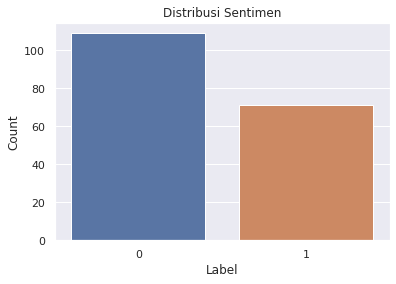

In [ ]:
sns.set(style='darkgrid')
b = sns.countplot(x='sentimen', data=data2.drop(['artikel'], axis = 1).astype(int))
b.axes.set_title('Distribusi Sentimen')
b.set_xlabel('Label')
b.set_ylabel('Count')
plt.show()

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
def deep_model(model, x_train, y_train, x_valid, y_valid):
  '''
  Function to train a multi-class model. The number of epochs and batch_size are set by the constants at the top of the notebook.

  Parameters:
  model: model with the chosen architecture
  x_train: training features
  y_train: training target
  x_valid: validation features
  y_valid: validation target
  Output: model training history
  '''
  model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  history = model.fit(x_train, y_train, epochs = NB_START_EPOCHS,
                      batch_size = BATCH_SIZE,
                      validation_data = (x_valid, y_valid),
                      verbose = 0)
  return history

def eval_metric(model, history, metric_name):
  '''
  Function to evaluate a trained model on a chosen metric.
  Training and validation metric are plotted in a line chart for each epochs.

  Parameters:
  history: model training history
  metric_name: loss or accuracy
  output: line chart with epochs of x-axis and metric on y-axis
  '''

  metric = history.history[metric_name]
  val_metric = history.history['val_'+metric_name]

  e = range(1, NB_START_EPOCHS + 1)

  plt.plot(e, metric, 'bo', label='Train ' + metric_name)
  plt.plot(e, val_metric, 'b', label='Validation '+ metric_name)
  plt.xlabel('Epoch number')
  plt.ylabel(metric_name)
  plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
  plt.legend()
  plt.show()

def test_model(model, x_train, y_train, x_test, y_test, epoch_stop):
  '''
  Function to test the model on new data after training it on the full training
  data with the optimal number of epochs.
  Parameters:
  model: trained model
  x_train: training features
  y_train: training target
  x_test: test features
  y_test: test target
  epochs: optimal number of epochs
  output: test accuracy and test loss
  '''
  model.fit(x_train, y_train, epochs=epoch_stop,
            batch_size=BATCH_SIZE,
            verbose = 0)
  results = model.evaluate(x_test, y_test)
  print()
  print('test accuracy: {0:.2f}%'.format(results[1]*100))
  return results

def lemmatize(text):
  lmtz = Lemmatizer()
  return lmtz.lemmatize(text)

def stopword(text):
    stpwrd = StopWord()
    return stpwrd.remove_stopword(text)

space = re.compile('[/(){}\[\]\|@,;]')
symbols = re.compile('[^0-9a-z #+_]')

def clean_text(text):
  text = text.lower()
  text = space.sub(' ', text)
  text = symbols.sub(' ', text)
  text = text.replace('x', '')
  #text = ' '.join(word for word in text.split() if word not in data)
  return text

def compare_models_by_metric(model_1, model_2, model_hist_1, model_hist_2, metric):
  '''
  Function to compare a metric between two models
  parameter:
  model_hist_1: training history of model 1
  model_hist_2: training history of model 2
  metric: metric to compare, loss, acc, val_loss, val_acc
  output: plot of metrics of both models
  '''
  metric_model_1 = model_hist_1.history[metric]
  metric_model_2 = model_hist_2.history[metric]

  e = range(1, NB_START_EPOCHS + 1)

  metrics_dict = {
      'acc': 'Training Accuracy',
      'loss': 'Training Loss',
      'val_acc': 'Validation accuracy',
      'val_loss': 'Validation loss'
  }

  metric_label = metrics_dict[metric]

  plt.plot(e, metric_model_1, 'bo', label=model_1.name)
  plt.plot(e, metric_model_2, 'b', label=model_2.name)
  plt.xlabel('Epoch number')
  plt.ylabel(metric_label)
  plt.title('Comparing ' + metric_label + ' between models')
  plt.legend()
  plt.show()

def optimal_epoch(model_hist):
  '''
  Function to return the epoch number where the validation loss i s at its minimum 
  Parameter:
  model_hist: training history of model
  output: epoch number with minim val loss
  '''

  min_epoch = np.argmin(model_hist.history['val_loss'])+1
  print('Minimum validation loss reached in epoch {}'.format(min_epoch))
  return min_epoch

**DATA PREPARATION**

In [ ]:
'''
1. load csv
2. shuffe the data before splitting it
3. only keep the 'text' and 'sentiment'
4. remove stopword
'''

"\n1. load csv\n2. shuffe the data before splitting it\n3. only keep the 'text' and 'sentiment'\n4. remove stopword\n"

In [ ]:
data2['artikel'] = data2['artikel'].apply(clean_text)
data2['artikel'] = data2['artikel'].apply(stopword)
data2['artikel'] = data2['artikel'].apply(lemmatize)

**Train Test Split**

In [ ]:
train, test = train_test_split(data2, test_size = 0.2, random_state = 1)
t_1 = train[train['sentimen'] == 1]
print(t_1.shape)
t_0 = train[train['sentimen'] == 0]
print(t_0.shape)
print(test.shape)

(56, 2)
(88, 2)
(36, 2)


In [ ]:
d_1 = t_1.sample(56,replace=True)
d_0 = t_0.sample(56,replace=True)
train = pd.concat([d_1,d_0])

In [ ]:
print(train.shape)

(112, 2)


In [ ]:
train_pos = train[train['sentimen'] == 1]
train_pos = train_pos['artikel']
train_neg = train[train['sentimen'] == 0]
train_neg = train_neg['artikel']

Positif


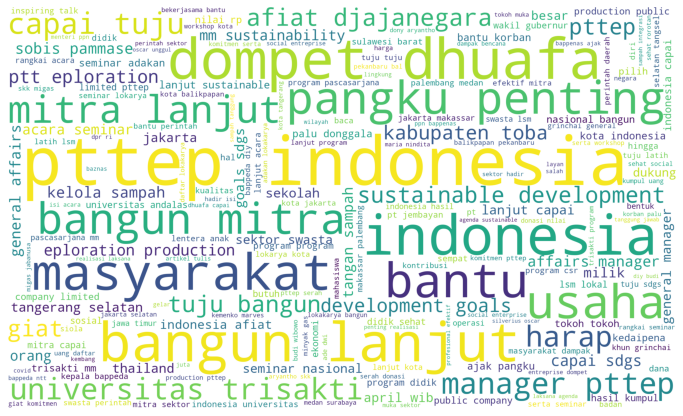

Negatif


In [ ]:
from wordcloud import WordCloud

def wordcloud_raw(data, color='black'):
  words = ' '.join(data)
  wordcloud = WordCloud(background_color=color,
                        width=2500,
                        height=1500
                        ).generate(words)
  plt.figure(1, figsize=(12,9))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

print('Positif')
wordcloud_raw(train_pos, 'white')
print('Negatif')
wordcloud_raw(train_neg)

In [ ]:
x_train = train['artikel'].values
x_test = test['artikel'].values
y_train = train['sentimen']
y_test = test['sentimen']

**Converting words to numbers**

convert words into tokens, which meand converting the words to integers that refer to an index in a dictionary. we will only keep the most frequent words in the training set.

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{"}~\t\n',
               lower = True,
               char_level = False,
               split = ' ')
tk.fit_on_texts(x_train)

In [ ]:
print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

In [ ]:
x_train_oh = tk.texts_to_matrix(x_train, mode='binary')
x_test_oh = tk.texts_to_matrix(x_test, mode='binary')

**Converting target classes to numbers**

In [ ]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

**Splitting off a validation set**

In [ ]:
x_train_rest, x_valid, y_train_rest, y_valid = train_test_split(x_train_oh, y_train_oh, test_size = 0.2, random_state=37)

# DEEP LEARNING

**Creating a model**

In [ ]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(2, activation='sigmoid'))
base_model.summary()

In [ ]:
base_history = deep_model(base_model, x_train_rest, y_train_rest, x_valid, y_valid)

In [ ]:
eval_metric(base_model, base_history, 'loss')

In [ ]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(16, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(2, activation='sigmoid'))
reduced_model.summary()
#sigmoid untuk biclass, softmax untuk multiclass classification

In [ ]:
reduced_history = deep_model(reduced_model, x_train_rest, y_train_rest, x_valid, y_valid)

In [ ]:
eval_metric(reduced_model, reduced_history, 'loss')

In [ ]:
compare_models_by_metric(base_model, reduced_model, base_history, reduced_history, 'val_loss')

In [ ]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(2, activation='sigmoid'))
reg_model.summary()

In [ ]:
reg_history = deep_model(reg_model, x_train_rest, y_train_rest, x_valid, y_valid)

In [ ]:
eval_metric(reg_model, reg_history, 'loss')

In [ ]:
compare_models_by_metric(reduced_model, reg_model, base_history, reg_history, 'val_loss')

In [ ]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(2, activation='sigmoid'))
drop_model.summary()

In [ ]:
drop_history = deep_model(drop_model, x_train_rest, y_train_rest, x_valid, y_valid)

In [ ]:
eval_metric(drop_model, drop_history, 'loss')

In [ ]:
compare_models_by_metric(reduced_model, drop_model, base_history, drop_history, 'val_loss')

In [ ]:
base_min = optimal_epoch(base_history)
reduced_min = optimal_epoch(reduced_history)
reg_min = optimal_epoch(reg_history)
drop_min = optimal_epoch(drop_history)

In [ ]:
base_results = test_model(base_model, x_train_oh, y_train_oh, x_test_oh, y_test_oh, base_min)

In [ ]:
reduced_results = test_model(reduced_model, x_train_oh, y_train_oh, x_test_oh, y_test_oh, reduced_min)

In [ ]:
reg_results = test_model(reg_model, x_train_oh, y_train_oh, x_test_oh, y_test_oh, reg_min)

In [ ]:
drop_results = test_model(drop_model, x_train_oh, y_train_oh, x_test_oh, y_test_oh, drop_min)

In [ ]:
link_test = ['https://theconversation.com/narasi-yang-hilang-dari-liputan-media-tentang-tumpahan-minyak-montara-102253',
'https://lkc.dompetdhuafa.org/pttep-dan-lkc-dompet-dhuafa-bentuk-pos-sehat-bindu-ptm-perdana-di-jakarta-utara/',
'https://demo.katadata.co.id/berita/2019/06/17/kasus-montara-petani-rumput-laut-indonesia-gugat-pttep-rp-2-triliuan',
'https://kebijakankesehatanindonesia.net/25-berita/berita/3880-100-duta-sehat-urai-permasalahan-kesehatan-negeri',
'https://palpos.id/2019/06/18/petani-rumput-laut-indonesia-tuntut-thailand-rp19-triliun/',
'https://investor.id/lifestyle/gerai-sehat-rorotan-pttep-dompet-dhuafa-edukasi-masyarakat-hidup-sehat',
'https://beritagar.id/artikel/telatah/tragedi-kilang-montara',
'https://www.jitunews.com/read/78881/perusahaan-migas-thailand-ini-aktif-gelar-csr-di-indonesia-apa-tujuannya',
'https://aksi.id/artikel/34932/9-Tahun-Berlalu-Ganti-Rugi-Tumpahan-Minyak-Montara-Tak-Nyata/',
'https://www.republika.co.id/berita/ptwooi423/pttep-gandeng-dompet-dhuafa-cari-100-duta-sehat-untuk-negeri',
'https://finance.detik.com/energi/d-4506356/10-tahun-berlalu-kasus-tumpahan-minyak-montara-masuk-babak-baru',
'https://news.prokal.co/read/news/3921-pentingnya-sustainability-di-dunia-pendidikan-indonesia-pttep-rencanakan-bangun-blok-migas-sawit-di-kaltim/6',
'https://tirto.id/jalan-panjang-petani-rumput-laut-ntt-melawan-pttep-chKd',
'http://www.cakrawalanews.co.id/artikel/2951/PTTEP-Bersama-Dompet-Dhuafa-Cari-100-Duta-Sehat-untuk-Negeri/',
'https://www.hukumonline.com/berita/baca/lt5caf4e50c29ce/10-tahun-terkatung--ri-tuntut-tanggung-jawab-australia-atas-kasus-montara/',
'https://ekbis.sindonews.com/berita/1336102/34/perusahaan-migas-thailand-dorong-keberlanjutan-di-sulawesi-barat',
'https://www.voaindonesia.com/a/indonesia-tuntut-pttep-usd-2-miliar-terkait-tumpahan-minyak-/3838407.html',
'https://mix.co.id/corporate-social-initiative/csr/co-csr-pttep-dan-dompet-dhuafa-di-program-gerai-sehat-rorotan/',
'https://kabar24.bisnis.com/read/20171217/16/719077/kasus-minyak-montara-pttep-australasia-dan-pttep-tolak-mediasi',
'https://www.topbusiness.id/13190/belum-berproduksi-pttep-gelontorkan-us-5-juta-untuk-csr.html',
'https://www.beritasatu.com/nasional/429855/digugat-soal-pencemaran-pttep-thailand-tunda-investasi-di-indonesia',
'https://www.tribunnews.com/nasional/2018/08/04/pttep-indonesia-dan-mm-sustainability-trisakti-gelar-seminar-nasional-bahas-sdgs',
'https://www.beritasatu.com/nasional/526250/montara-makin-tak-terdengar-pttep-australia-belum-beritikad-baik',
'https://www.jpnn.com/news/pttep-indonesia-dan-universitas-trisakti-gelar-seminar-sdgs',
'https://www.beritasatu.com/nasional/513709/pttep-masih-dilarang-operasikan-kembali-kilang-montara',
'https://www.merdeka.com/uang/pttep-indonesia-kucurkan-rp-39-miliar-untuk-sobis-pammase.html',
'https://maritim.go.id/kemenko-maritim-desak-australia-selesaikan-kasus-montara/',
'https://ekbis.sindonews.com/berita/1325372/34/pttep-indonesia-bangun-kemitraan-berkelanjutan-bangun-sdgs',
'https://www.viva.co.id/arsip/194965-alasan-negosiasi-tumpahan-minyak-montara-lama',
'https://www.wartaekonomi.co.id/read247160/pttep-soroti-sustainable-resources-dan-tourism-di-bali',
'https://www.bbc.com/indonesia/dunia/2010/07/100723_nomontaraclaim',
'https://ekonomi.bisnis.com/read/20170620/44/664773/rencana-pttep-di-indonesia-tak-terpengaruh-kasus-montara',
'http://maritimnews.com/2017/05/cemari-wilayah-ntt-pemerintah-gugat-pttep-australasia-montara-275-triliun/',
'https://www.beritasatu.com/nasional/543465/dukung-target-sdgs-pttep-indonesia-gandeng-trisakti',
'https://www.borneonews.co.id/berita/210035-nelayan-ntt-menangkan-gugatan-tumpahan-minyak-montara',
'https://republika.co.id/berita/ekonomi/korporasi/18/05/03/p85rke440-pttep-anggarkan-dana-csr-rp-685-miliar-di-indonesia',
'https://betahita.id/news/lipsus/3356/10-tahun-tertunda-kasus-tumpahan-minyak-montara-kembali-mendapat-perhatian.html?v=1591732410',
'http://dephub.go.id/post/read/pttep-australasia-berikan-us-5-juta-sebagai-bentuk-tanggung-jawab-sosial-csr-atas-penecemaran-laut-timor-4246?language=en',
'https://metrosidik.co.id/hukum/baca/12634/rakyat-ntt-menang-gugatan-pttep-kasus-tumpahan-minyak-montara',
'https://www.medcom.id/ekonomi/energi/0kp7waqb-perusahaan-migas-thailand-gelontorkan-dana-csr-ke-indonesia-rp45-miliar',
'https://www.indopremier.com/ipotnews/newsDetail.php?jdl=Buntut_Tumpahan_Minyak__PTTEP_Harapkan_Penyelesaian_Kasus_Montara_Di_Luar_Pengadilan__&news_id=89923&group_news=IPOTNEWS&news_date=&taging_subtype=MINYAKDANGAS&name=&search=y_general&q=migas,%20minyak%20dan%20gas,&halaman=1',
'https://www.merdeka.com/uang/perusahaan-migas-thailand-bantu-kesehatan-dan-pendidikan-ri-rp-45-m.html',
'https://www.kai.or.id/berita/6861/kasus-montara-tim-advokasi-minta-pemerintah-bekukan-izin-pttep.html',
'https://money.kompas.com/read/2017/03/13/205223726/csr.dompet.dhuafa.dan.perusahaan.minyak.thailand.cegah.kanker.serviks',
'https://iesr.or.id/blok-montara-percayalah-kami-sedang-bekerja-keras',
'https://www.tribunnews.com/corona/2020/05/01/dunia-usaha-berperan-penting-dalam-penanganan-covid-19']

In [ ]:
beritasdua = []
for link in link_test:
  try:
    berita = get_news(link)
    beritasdua.append(berita)
    print('sukses')
  except:
    print('fail '+ link)


sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
fail https://finance.detik.com/energi/d-4506356/10-tahun-berlalu-kasus-tumpahan-minyak-montara-masuk-babak-baru
sukses
fail https://tirto.id/jalan-panjang-petani-rumput-laut-ntt-melawan-pttep-chKd
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses
sukses


In [ ]:
print(len(beritasdua))
news3 = pd.DataFrame(beritasdua, columns=['artikel'])
sentiment_test = [0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
news3['sentimen'] = sentiment_test

44


In [ ]:
news3

artikel  sentimen
0   \n      Lecturer in the School of Media, Cultu...         0
1   LKC.DompetDhuafa.org (Jakarta)-PTT Exploration...         1
2   ©2021 Katadata. Hak cipta dilindungi Undang-un...         0
3     PTTEP perusahaan migas milik pemerintah Thai...         1
4   MELBOURNE,PALPOS.ID Â – Para petani rumput lau...         0
5   Anda belum login Anda belum login Sign InorSig...         1
6   You will be connected to beritagar.id in just ...         0
7   Lepas Ekspor Produk Pertanian Senilai Rp 1,2 T...         1
8    JAKARTA (aksi.id) - Pemerintah sampai saat in...         0
9   Monday, 26 Syawwal 1442 / 07 June 2021 Monday,...         1
10  Please enable Cookies and reload the page. Thi...         1
11    CN, Jakarta - PTTEP perusahaan minyak dan ga...         1
12  Kami memasang iklan pada konten yang Anda ingi...         0
13                      PHOTO  Yanuar Riezqi Yovanda          1
14  \n\n\nPrint\n\n Sydney Morning Herald melapork...         0
15  Hadir di Indonesia pada tahun 2010 silam, PTTE...         1
16  Bisnis.com, JAKARTA — Perusahaan asal Thailand...         0
17  Jumpa pers Penyelenggaraan Seminar Bertema Mem...         1
18  AGRI  1577 (0)   |   BASIC-IND  938 (0)   |   ...         0
19  TRIBUNNEWS.COM - PTTEP Indonesia dan Program P...         1
20  AGRI  1577 (0)   |   BASIC-IND  938 (0)   |   ...         0
21  jpnn.com, BALIKPAPAN - PTTEP Indonesia dan Uni...         1
22  AGRI  1577 (0)   |   BASIC-IND  938 (0)   |   ...         0
23  Merdeka.com -  Perusahaan eksplorasi dan produ...         1
24                                    400 Bad Request         0
25                            PHOTO  Hasan Kurniawan          1
26  VIVAnews - PTT Exploration and Production (PTT...         0
27  Anak perusahaan dari PTT Exploration and Produ...         1
28  Sementara menurut pemerintah Indonesia kerugia...         0
29    Bisnis.com, JAKARTA - Terus bergulirnya kasu...         1
30  Deputi Bidang Koordinasi Kedaulatan Maritim Ar...         0
31  AGRI  1577 (0)   |   BASIC-IND  938 (0)   |   ...         1
32  BORNEONEWS, Jakarta - Pengadilan federal Austr...         0
33  Monday, 26 Syawwal 1442 / 07 June 2021 Monday,...         1
34  Betahita.id - Kasus tumpahan minyak Montara di...         0
35  \n            Biro Komunikasi dan Informasi Pu...         1
36  JAKARTA, METROSIDIK.CO,ID — Pengadilan federal...         0
37  Don't have an account yet? Sign up here Bagaim...         1
38  Image Verification Forget Password Register He...         0
39  Merdeka.com -  PTT Exploration and Production ...         1
40   Hukumonline.com – Ketua tim advokasi petani r...         0
41  CSR Dompet Dhuafa dan Perusahaan Minyak Thaila...         1
42  Author : Pemerintah Indonesia optimis jika PTT...         0
43  Laporan Wartawan Tribunnews.com, Reynas Abdill...         1

In [ ]:
news3['artikel'] = news3['artikel'].apply(clean_text)
news3['artikel'] = news3['artikel'].apply(stopword)
news3['artikel'] = news3['artikel'].apply(lemmatize)

In [ ]:
x_tes = news3['artikel'].values
y_tes = news3['sentimen']

In [ ]:
x_tes_oh = tk.texts_to_matrix(x_tes, mode='binary')
y_tes_le = le.transform(y_tes)
y_tes_oh = to_categorical(y_tes_le)

In [ ]:
hasil_tes1 = test_model(base_model, x_train_oh, y_train_oh, x_tes_oh, y_tes_oh, base_min)

In [ ]:
hasil_tes2 = test_model(reduced_model, x_train_oh, y_train_oh, x_tes_oh, y_tes_oh, reduced_min)

2/2 [==============================] - 0s 6ms/step - loss: 0.2724 - accuracy: 0.8864

test accuracy: 88.64%


In [ ]:
hasil_tes3 = test_model(reg_model, x_train_oh, y_train_oh, x_tes_oh, y_tes_oh, reg_min)

2/2 [==============================] - 0s 13ms/step - loss: 0.2722 - accuracy: 0.8636

test accuracy: 86.36%


In [ ]:
hasil_tes4 = test_model(drop_model, x_train_oh, y_train_oh, x_tes_oh, y_tes_oh, drop_min)

2/2 [==============================] - 0s 6ms/step - loss: 0.3822 - accuracy: 0.8636

test accuracy: 86.36%


In [ ]:
hasil = reg_model.predict_classes(x_tes_oh)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
akurasinya = reg_model.evaluate(x_tes_oh, y_tes_oh)

2/2 [==============================] - 0s 11ms/step - loss: 0.2722 - accuracy: 0.8636


In [ ]:
news3['prediksi'] = hasil

In [ ]:
news3

artikel  sentimen  prediksi
0   lecturer in the school of media culture and cr...         0         0
1   lkc dompetdhuafa org jakarta ptt eploration an...         1         1
2   2021 katadata hak cipta lindung undang undang ...         0         0
3   pttep usaha migas milik perintah thailand domp...         1         1
4   melbourne palpos id tani rumput laut indonesia...         0         0
5   login login sign inorsign up email password na...         1         1
6   you will be connected to id in just a moment l...         0         1
7   lepas ekspor produk tani nilai rp 1 2 t menko ...         1         1
8   jakarta aksi id perintah hitung besar ganti ru...         0         0
9   monday 26 syawwal 1442 07 june 2021 monday 26 ...         1         1
10  please enable cookies and reload the page this...         1         1
11  cn jakarta pttep usaha minyak gas thailand dom...         1         1
12  pasang iklan konten jelajah iklan bantu konten...         0         0
13                        photo yanuar riezqi yovanda         1         1
14  print sydney morning herald lapor perintah ind...         0         0
15  hadir indonesia 2010 silam pttep usaha oil gas...         1         1
16  bisnis com jakarta usaha thailand ptt eplorati...         0         0
17  jumpa pers selenggara seminar tema bangun mitr...         1         1
18  agri 1577 0 basic ind 938 0 bisnis 27 477 5 co...         0         0
19  tribunnews com pttep indonesia program pascasa...         1         1
20  agri 1577 0 basic ind 938 0 bisnis 27 477 5 co...         0         0
21  jpnn com balikpapan pttep indonesia universita...         1         1
22  agri 1577 0 basic ind 938 0 bisnis 27 477 5 co...         0         0
23  com usaha eksplorasi produksi minyak nasional ...         1         1
24                                    400 bad request         0         1
25                              photo hasan kurniawan         1         1
26  vivanews ptt eploration and production pttep t...         0         0
27  anak usaha ptt eploration and production publi...         1         1
28  perintah indonesia rugi langsung rp500m usaha ...         0         0
29  bisnis com jakarta gulir tumpah minyak lapang ...         1         0
30  deputi bidang koordinasi daulat maritim arif h...         0         0
31  agri 1577 0 basic ind 938 0 bisnis 27 477 5 co...         1         1
32  borneonews jakarta adil federal australia sydn...         0         0
33  monday 26 syawwal 1442 07 june 2021 monday 26 ...         1         1
34  betahita id tumpah minyak montara laut timor c...         0         0
35  biro komunikasi informasi publik thursday 17 m...         1         0
36  jakarta metrosidik id adil federal australia s...         0         0
37  don t have an account yet sign up here tanggap...         1         0
38  image verification forget password register he...         0         1
39  com ptt eploration and production public compa...         1         1
40  hukumonline com ketua tim advokasi tani rumput...         0         0
41  csr dompet dhuafa usaha minyak thailand cegah ...         1         1
42  author perintah indonesia optimis pttep austra...         0         0
43  lapor wartawan tribunnews com reynas abdilla t...         1         1

In [ ]:
import plotly.graph_objects as go

labels = ['Positif','Negatif']
values = news3['prediksi'].value_counts()

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
link_test.pop(10)

'https://finance.detik.com/energi/d-4506356/10-tahun-berlalu-kasus-tumpahan-minyak-montara-masuk-babak-baru'

In [ ]:
link_test.pop(11)

'https://tirto.id/jalan-panjang-petani-rumput-laut-ntt-melawan-pttep-chKd'

In [ ]:
news3['link'] = link_test

In [ ]:
news3

artikel  ...                                               link
0   lecturer in the school of media culture and cr...  ...  https://theconversation.com/narasi-yang-hilang...
1   lkc dompetdhuafa org jakarta ptt eploration an...  ...  https://lkc.dompetdhuafa.org/pttep-dan-lkc-dom...
2   2021 katadata hak cipta lindung undang undang ...  ...  https://demo.katadata.co.id/berita/2019/06/17/...
3   pttep usaha migas milik perintah thailand domp...  ...  https://kebijakankesehatanindonesia.net/25-ber...
4   melbourne palpos id tani rumput laut indonesia...  ...  https://palpos.id/2019/06/18/petani-rumput-lau...
5   login login sign inorsign up email password na...  ...  https://investor.id/lifestyle/gerai-sehat-roro...
6   you will be connected to id in just a moment l...  ...  https://beritagar.id/artikel/telatah/tragedi-k...
7   lepas ekspor produk tani nilai rp 1 2 t menko ...  ...  https://www.jitunews.com/read/78881/perusahaan...
8   jakarta aksi id perintah hitung besar ganti ru...  ...  https://aksi.id/artikel/34932/9-Tahun-Berlalu-...
9   monday 26 syawwal 1442 07 june 2021 monday 26 ...  ...  https://www.republika.co.id/berita/ptwooi423/p...
10  please enable cookies and reload the page this...  ...  https://news.prokal.co/read/news/3921-pentingn...
11  cn jakarta pttep usaha minyak gas thailand dom...  ...  http://www.cakrawalanews.co.id/artikel/2951/PT...
12  pasang iklan konten jelajah iklan bantu konten...  ...  https://www.hukumonline.com/berita/baca/lt5caf...
13                        photo yanuar riezqi yovanda  ...  https://ekbis.sindonews.com/berita/1336102/34/...
14  print sydney morning herald lapor perintah ind...  ...  https://www.voaindonesia.com/a/indonesia-tuntu...
15  hadir indonesia 2010 silam pttep usaha oil gas...  ...  https://mix.co.id/corporate-social-initiative/...
16  bisnis com jakarta usaha thailand ptt eplorati...  ...  https://kabar24.bisnis.com/read/20171217/16/71...
17  jumpa pers selenggara seminar tema bangun mitr...  ...  https://www.topbusiness.id/13190/belum-berprod...
18  agri 1577 0 basic ind 938 0 bisnis 27 477 5 co...  ...  https://www.beritasatu.com/nasional/429855/dig...
19  tribunnews com pttep indonesia program pascasa...  ...  https://www.tribunnews.com/nasional/2018/08/04...
20  agri 1577 0 basic ind 938 0 bisnis 27 477 5 co...  ...  https://www.beritasatu.com/nasional/526250/mon...
21  jpnn com balikpapan pttep indonesia universita...  ...  https://www.jpnn.com/news/pttep-indonesia-dan-...
22  agri 1577 0 basic ind 938 0 bisnis 27 477 5 co...  ...  https://www.beritasatu.com/nasional/513709/ptt...
23  com usaha eksplorasi produksi minyak nasional ...  ...  https://www.merdeka.com/uang/pttep-indonesia-k...
24                                    400 bad request  ...  https://maritim.go.id/kemenko-maritim-desak-au...
25                              photo hasan kurniawan  ...  https://ekbis.sindonews.com/berita/1325372/34/...
26  vivanews ptt eploration and production pttep t...  ...  https://www.viva.co.id/arsip/194965-alasan-neg...
27  anak usaha ptt eploration and production publi...  ...  https://www.wartaekonomi.co.id/read247160/ptte...
28  perintah indonesia rugi langsung rp500m usaha ...  ...  https://www.bbc.com/indonesia/dunia/2010/07/10...
29  bisnis com jakarta gulir tumpah minyak lapang ...  ...  https://ekonomi.bisnis.com/read/20170620/44/66...
30  deputi bidang koordinasi daulat maritim arif h...  ...  http://maritimnews.com/2017/05/cemari-wilayah-...
31  agri 1577 0 basic ind 938 0 bisnis 27 477 5 co...  ...  https://www.beritasatu.com/nasional/543465/duk...
32  borneonews jakarta adil federal australia sydn...  ...  https://www.borneonews.co.id/berita/210035-nel...
33  monday 26 syawwal 1442 07 june 2021 monday 26 ...  ...  https://republika.co.id/berita/ekonomi/korpora...
34  betahita id tumpah minyak montara laut timor c...  ...  https://betahita.id/news/lipsus/3356/10-tahun-...
35  biro komunikasi informasi publik thursday 17 m...  ...  http://dephub.go.id/post/r

In [ ]:
news3.to_csv('koreksi.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_tes, hasil)
print(cm)

[[18  3]
 [ 3 20]]


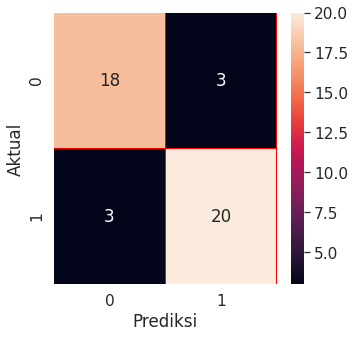

In [ ]:
#Visualisasi dengan seaborn

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm2, annot=True, linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
import plotly.figure_factory as ff

labelnya = ['Negatif','Positif']

fig = ff.create_annotated_heatmap(cm2, x=labelnya, y=labelnya)
fig.update_layout(yaxis = dict(categoryorder='category descending'))
fig.show()

In [ ]:
import plotly.figure_factory as ff

z = cm2

# invert z idx values
z = z[::-1]

x = ['positif', 'negatif']
y =  x[::-1].copy() # invert idx values of x
z_text = [[str(y) for y in x] for x in z]

#UNTUK COLORSCALE
#colorscale1 = [[0, 'plum'], [1, 'gray']]
#'Viridis'
#'Cividis'
#'RdBu'
#'Plasma'

fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                 )
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Prediksi",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Sentimen sesungguhnya",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

fig.update_layout(margin=dict(t=50, l=200))

fig['data'][0]['showscale'] = True
fig.show()